## Introduction

In this Jupyter notebook, we will analyze a dataset containing comments that may be toxic. Our goal is to train a machine learning model that can effectively predict whether a comment is harmful. We will be using the sklearn library to preprocess the dataset, create features, train the model, and evaluate the performance.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [2]:
df = pd.read_csv('train_preprocessed.csv')

## Dataset

The dataset we are using is `train_preprocessed.csv`, which consists of comments and their respective labels. These labels include 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', and 'toxic'. Each comment is annotated with binary values for each label, indicating whether the comment is considered toxic under that category.
### Check the dimensions of the dataset

In [3]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (159571, 10)


In [4]:
df.sample(10)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
84418,i do apologize once more to you for my unkind ...,e1c3d9ad6a93c846,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
95787,my own page however i like it,00415c215fc97fb2,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
79737,actually his edit about sun quan calling pan...,d554daad57aedae2,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
129035,file parliament uk svg could you please reduce...,b2155880191cdd98,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
69973,ok in the history i see the time but is ther...,bb3339bd82bd772b,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
138276,the authenticity of the page is questionable a...,e3e79f5cf606f1f8,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
98450,british th northumbrian infantry division co...,0ea24104ba655324,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
68830,i have given trying to get un block by that i...,b82852264cb2de9a,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
150541,restoring prior edit so the article covers thi...,6e01a95661ee5ade,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
75226,please stop if you continue to vandalize pag...,c94415be42d4ed50,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


## Check for missing values

In [5]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
comment_text     0
id               0
identity_hate    0
insult           0
obscene          0
set              0
severe_toxic     0
threat           0
toxic            0
toxicity         0
dtype: int64


## Data Exploration

Before diving into training the model, it is essential to explore and understand the dataset. Some useful visualizations and statistics will provide insights into the data and help us make informed decisions when training the model. 

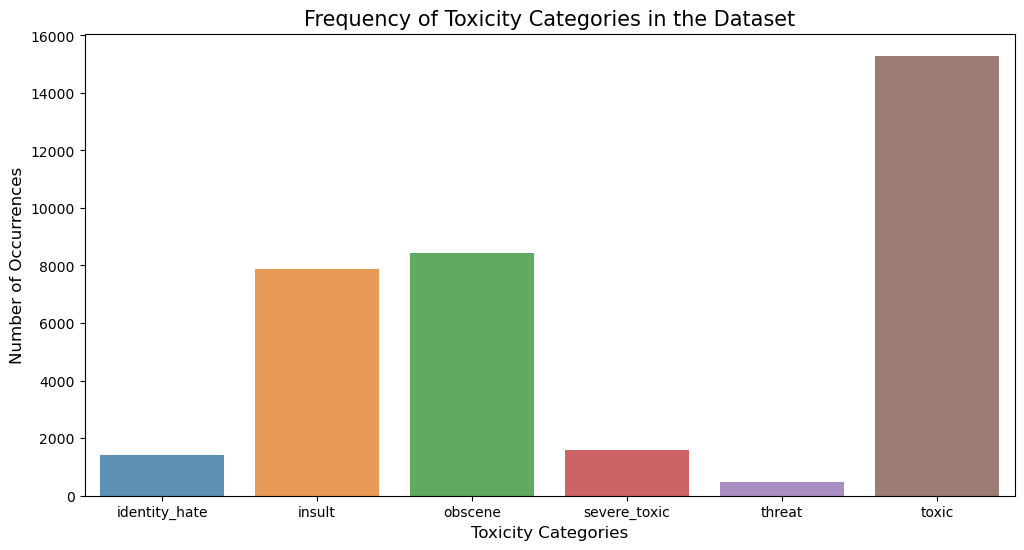

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
label_names = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
label_counts = df[label_names].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Toxicity Categories', fontsize=12)
plt.title('Frequency of Toxicity Categories in the Dataset', fontsize=15)
plt.show()

## Examples

Toxic

In [7]:
df.loc[df['toxic'] == 1].sample(10)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
153233,how did i vandalize the joke page on osama bi...,998d057fb2244447,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
20953,o die,374a7a4966cfb488,0.0,0.0,0.0,train,0.0,0.0,1.0,1.0
148176,racist racist like everybody else in that garbage,480f18c1185dc6f9,0.0,1.0,0.0,train,0.0,0.0,1.0,2.0
122369,what you think this block will work better th...,8e8f3733da1ee7e8,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
69056,monkey monkey monkey monkey monkey preceding...,b8bf4a279b99e8a4,0.0,0.0,0.0,train,0.0,0.0,1.0,1.0
122713,i honestly believe you are a sock puppet thats...,9073b708c08d2f4c,0.0,1.0,0.0,train,0.0,0.0,1.0,2.0
75038,this dude is paid scum deleting the clear owne...,c8c7c5f902375b3b,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
108776,faggot faggot faggot faggot faggot faggot fa...,4596dde81743baff,0.0,0.0,0.0,train,0.0,0.0,1.0,1.0
60535,are you as gay as danski if you are i will ...,a20c40c84c1bb19d,1.0,1.0,0.0,train,0.0,0.0,1.0,3.0
130033,thats what yopur mom said last night oh,b79f828bb11b371f,0.0,0.0,0.0,train,0.0,0.0,1.0,1.0


Threat

In [8]:
df.loc[df['threat'] == 1].sample(10)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
120166,fuck you slakr die wikipedia die wikipedia d...,82b5aed7526148df,0.0,1.0,1.0,train,1.0,1.0,1.0,5.0
56310,your a twat you just delete things that you d...,967a50ad6ec2b46c,0.0,1.0,1.0,train,0.0,1.0,1.0,4.0
111372,if you block me for telling you what you are ...,53e54744e80dcbf6,0.0,0.0,0.0,train,0.0,1.0,0.0,1.0
100274,fir t i a oin o ie ou u and kee ou on iou du...,18d4d21e96049ee7,0.0,0.0,1.0,train,0.0,1.0,1.0,3.0
38578,fuck you honkey why you hatin on blacks y...,66f0a9006c188820,1.0,1.0,1.0,train,1.0,1.0,1.0,6.0
31753,hello i think you are a fuck wad eat shit ...,5455342af097a90f,0.0,1.0,1.0,train,1.0,1.0,1.0,5.0
109241,you edit you edit is vandal stop or die,48320a741bf7b1b3,0.0,0.0,0.0,train,0.0,1.0,1.0,2.0
76438,you cock suck fuck you ok i hate you stop ...,cca4a83a43e2fd4b,0.0,1.0,1.0,train,1.0,1.0,1.0,5.0
36141,burn in hell weasel don t believe the jew ish ...,6093d9a0a796dd94,1.0,1.0,0.0,train,0.0,1.0,1.0,4.0
44831,die whore die you whore,77c7eb5d68eabaa5,0.0,1.0,1.0,train,1.0,1.0,1.0,5.0


Severe Toxic

In [9]:
df.loc[df['severe_toxic'] == 1].sample(10)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
143802,go fuck yourselves obviously you all are a bu...,02da76b6902d7d75,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
55,stupid peace of shit stop deleting my stuff ...,0020e7119b96eeeb,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
26947,good riddance you fuck ing ass hole bog off ...,475d111a43da516d,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
84728,you are fuck ing calling my talking on my own...,e2b40cf1f1190cf3,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
125670,hi please read this its important fuck you bi...,a04b778673ce16fe,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
136136,fuck off you stupid aspy ass hole,d82e45eb103ad07b,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
27873,read this is a free country don t you think yo...,49c98453a086cf5a,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
6,cock suck before you piss around on my work,0002bcb3da6cb337,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
56899,you are an ass hole,9814704be8a5cfde,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
99202,fuck you bitch fuck you bitch,12a5ad583296b545,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0


Obscene

In [10]:
df.loc[df['obscene'] == 1].sample(10)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
143930,rob you re a little coward and thuggish boor ...,04c387644a08075d,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
1228,watch out for user xeno hell bite your dick off,034cf319ae8fab24,0.0,0.0,1.0,train,0.0,0.0,1.0,2.0
14780,dreamguy i ve already promised ed that i will ...,270b6cf6ee85dcc7,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
10852,what the fuck does a dumb canadian polock li...,1cb02b861c944fb9,1.0,1.0,1.0,train,0.0,0.0,1.0,4.0
65738,where does it say that featured articles have...,afd3ae90492e577d,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0
97307,exactly you ll want to show them what an attr...,08a38566bf8b86b5,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
138570,i did explain why you beyond incompetent worth...,e566abf908bcb2e3,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
47911,another moron who thinks it s below him to do ...,800576c2ac915848,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
113445,sango likes to suck cock,5ea9122213d531d1,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
17315,fuck you you dumb mother fuck ing ass h...,2db5f1302a4bc726,0.0,1.0,1.0,train,1.0,0.0,1.0,4.0


Insult

In [11]:
df.loc[df['insult'] == 1].sample(10)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
42268,ugly cat that is one ugly cat el c concernin...,70c7a607aa405e7e,0.0,1.0,0.0,train,0.0,0.0,1.0,2.0
5220,hate you hate you hate you hate you h...,0de42f5e853a41ef,0.0,1.0,0.0,train,0.0,0.0,1.0,2.0
92727,how do u like this u fuck ing dickass william,f7f2fc1cf93a1e78,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
62483,thanks an idiot ic deletion by an insuffer...,a73328e2f2b4ef97,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
65630,you fag wa wa i m a huge gay says you,af910540533f8ace,1.0,1.0,1.0,train,0.0,0.0,1.0,4.0
2667,the greater san francisco bay area is greater ...,072825b5cedee27f,0.0,1.0,0.0,train,0.0,0.0,1.0,2.0
48151,why is my best bet to apologize to the idiot...,80aece51be6d8e41,0.0,1.0,0.0,train,0.0,0.0,0.0,1.0
88892,th th thanks for deleting my fuck ing thing ...,edd28981dd206902,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0
39574,stupid prostitutes thank you,69a17a0c3ab7bd48,1.0,1.0,1.0,train,0.0,0.0,1.0,4.0
108507,revision the darth maul biography needs to be ...,4417e6290f8f7a68,0.0,1.0,1.0,train,0.0,0.0,1.0,3.0


Identity Hate

In [12]:
df.loc[df['identity_hate'] == 1].sample(10)

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
155336,fuck ing nigger shut up your dirty nigger...,bc5277c9a567c062,1.0,1.0,1.0,train,1.0,0.0,1.0,5.0
43127,eat shit an die faggot,730d50594e79e621,1.0,1.0,1.0,train,1.0,0.0,1.0,5.0
521,dictionaries how dare you call my contributio...,015d1b0bb4cc744d,1.0,1.0,1.0,train,0.0,0.0,1.0,4.0
20618,shut up are you indian brother i am from tam...,366f358bd0ea409f,1.0,1.0,0.0,train,0.0,0.0,1.0,3.0
42,you are gay or antisemmitian archangel white...,001810bf8c45bf5f,1.0,1.0,1.0,train,0.0,0.0,1.0,4.0
65075,faggot s yo fuck er it was fuck ing hayes...,ae1b1f693e4913b5,1.0,1.0,1.0,train,1.0,1.0,1.0,6.0
24660,i can t believe wiki is stupid enough as to ma...,4132e72ba804d884,1.0,1.0,1.0,train,0.0,0.0,1.0,4.0
142866,jetstreamer sad reality that guy is a gay a ...,fc10943840b8cf15,1.0,1.0,1.0,train,0.0,0.0,1.0,4.0
2937,dumb nigger z yall nigger s are dumb sea...,07f1e0a1c10fcf28,1.0,1.0,1.0,train,1.0,0.0,1.0,5.0
22500,spiketoronto is gay rcp,3b67eb65c5eb3980,1.0,1.0,0.0,train,0.0,0.0,1.0,3.0


## Preprocessing and Feature Extraction

We will be using the `CountVectorizer` class from the sklearn library to convert the comments into a matrix of token counts. This representation will serve as the input features for our model. The labels will remain unchanged.


In [13]:
df = pd.read_csv('train_preprocessed.csv')
train_df, test_df = train_test_split(df, test_size=0.2)
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_df['comment_text'])
test_features = vectorizer.transform(test_df['comment_text'])

## Model Training

We will be using the `OneVsRestClassifier` from the sklearn library with `LogisticRegression` as the base classifier. This approach enables the model to predict multiple labels for each comment.

In [14]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(train_features, train_df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']])
test_pred = clf.predict(test_features)

C:\Users\qcyja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\qcyja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

## Show the top words in toxic and non-toxic comments.

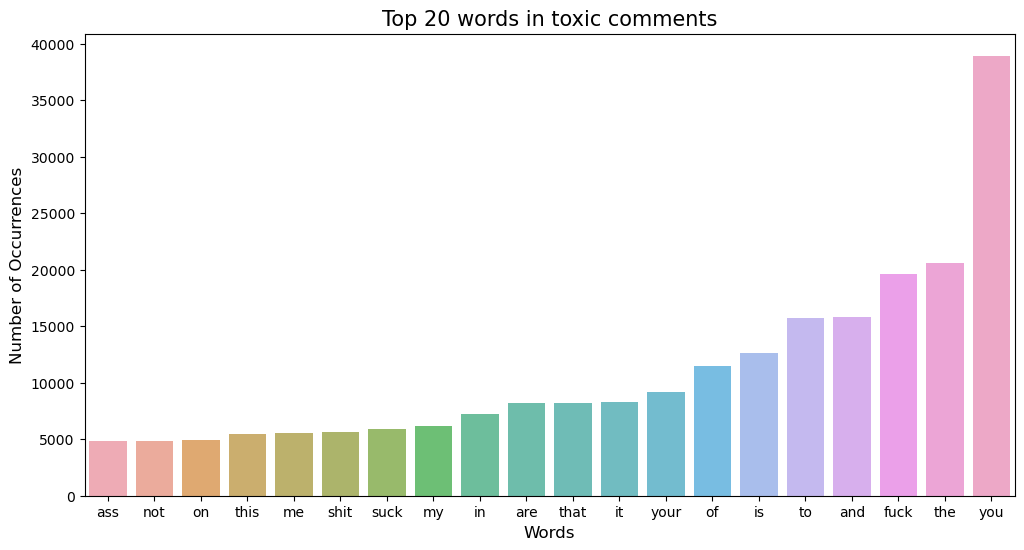

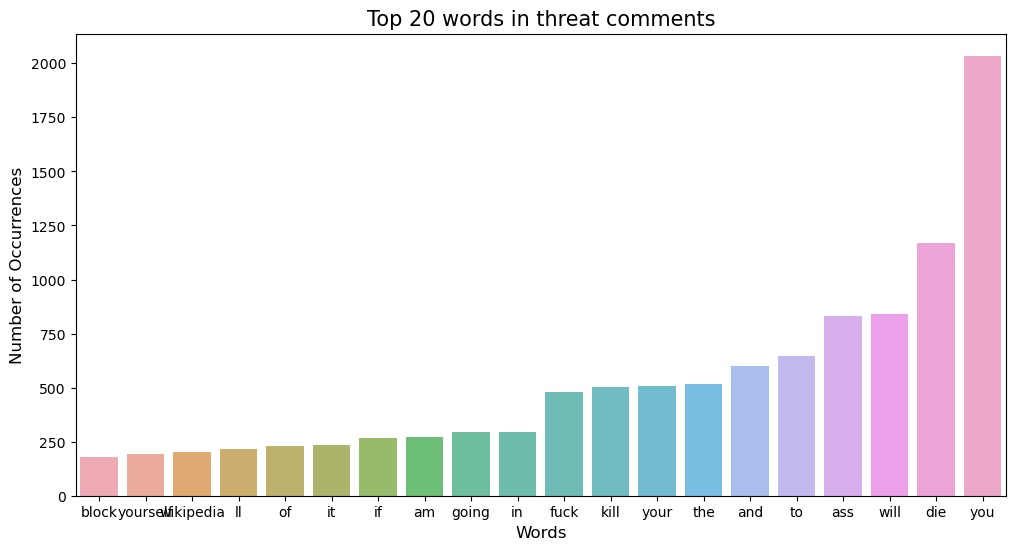

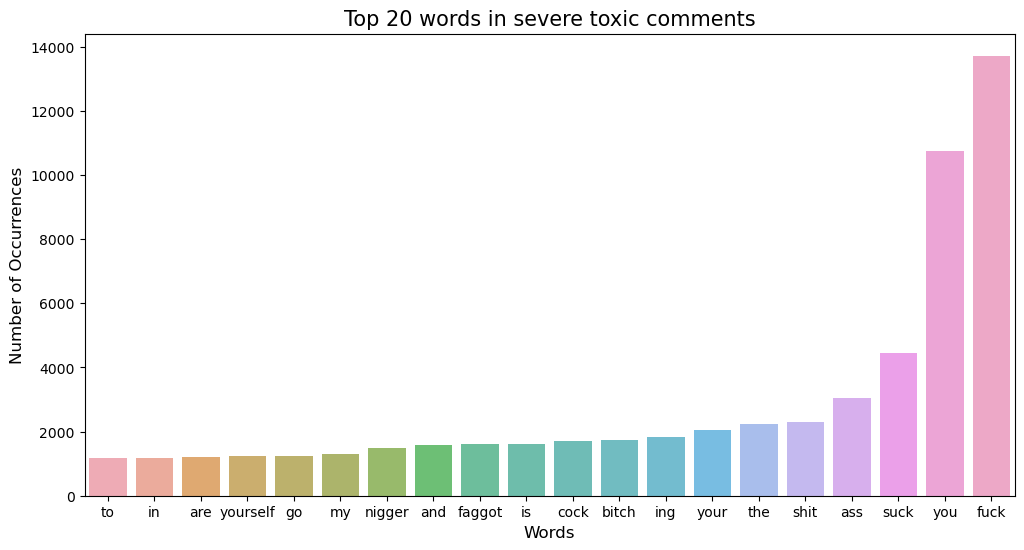

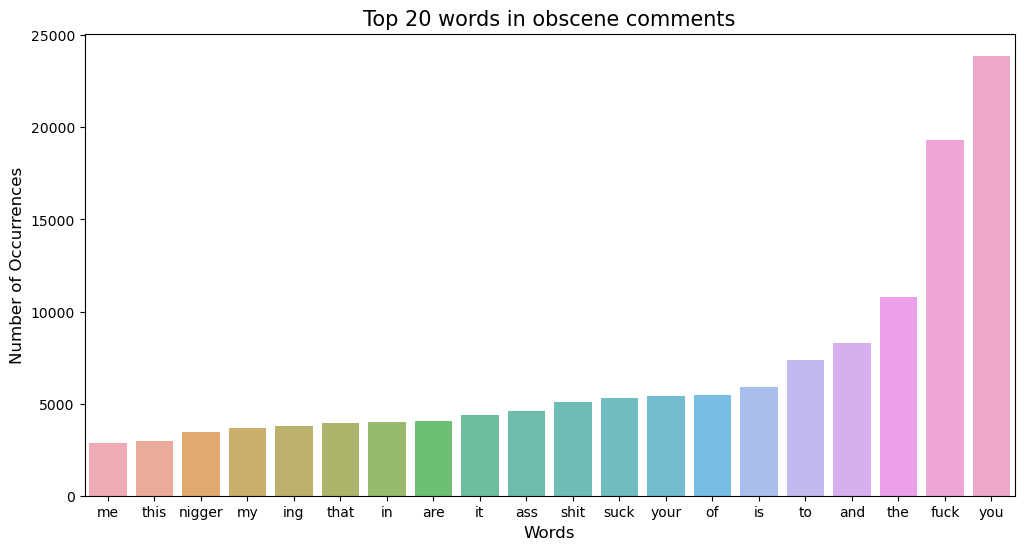

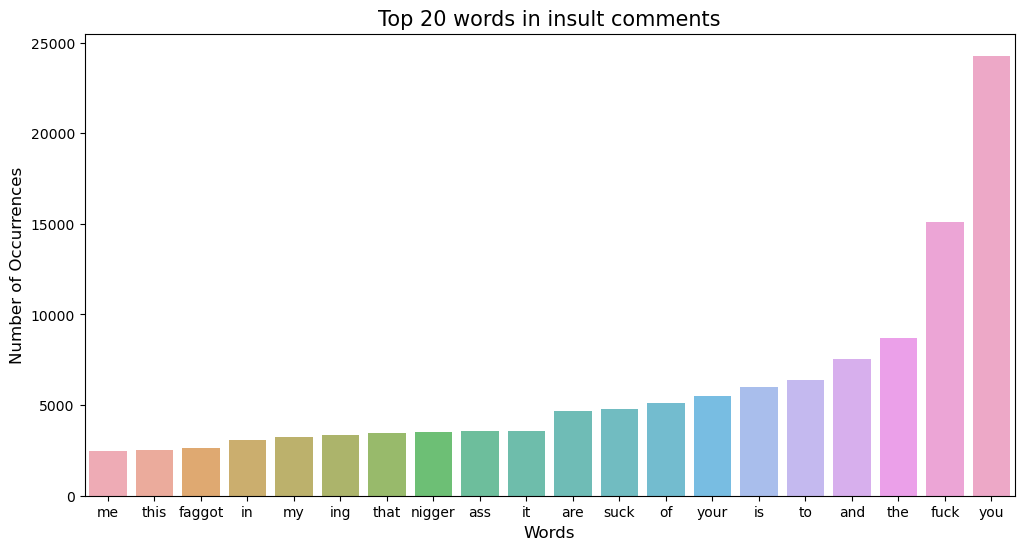

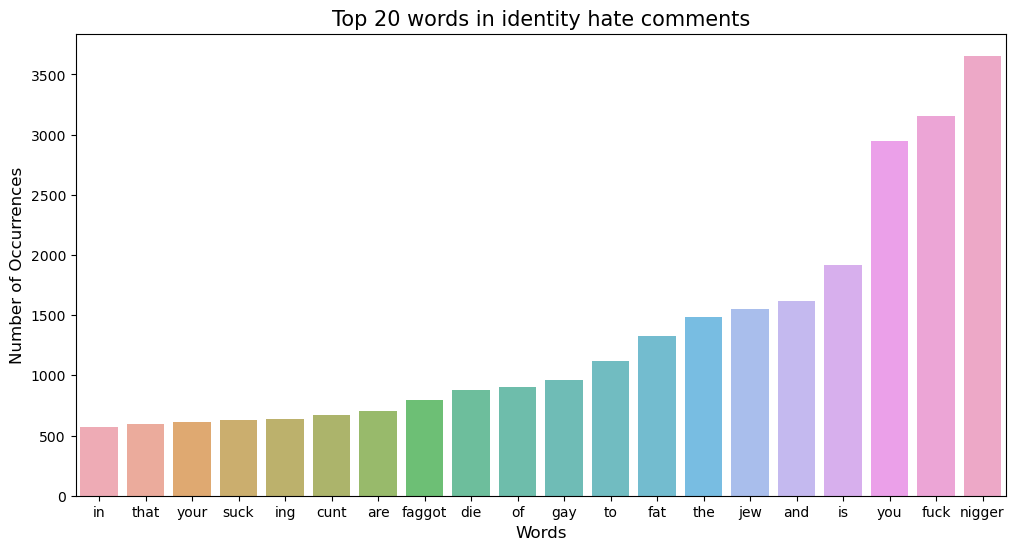

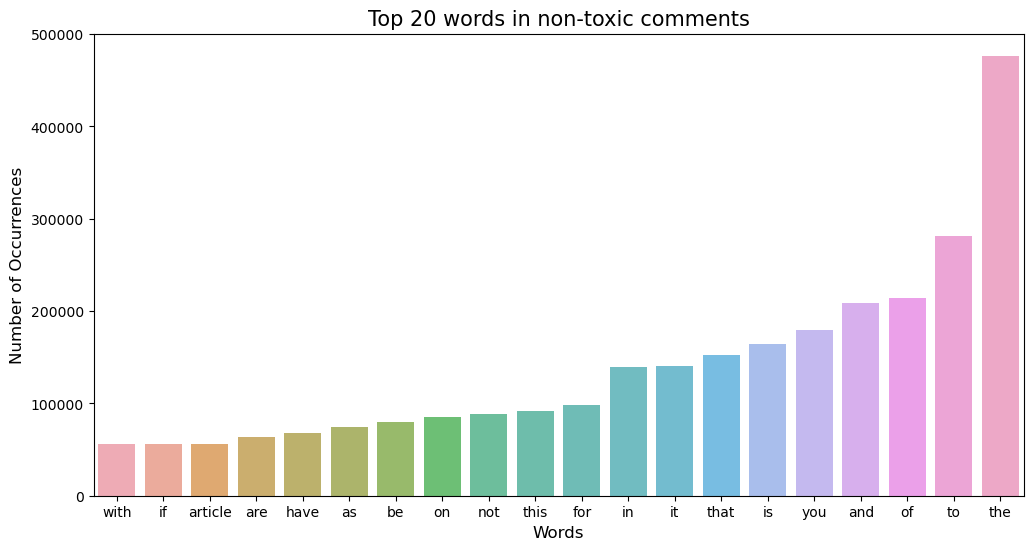

In [15]:
def plot_top_words(vectorizer, features, n_top_words, title):
    word_counts = features.sum(axis=0).tolist()[0]
    word_indices = list(np.argsort(word_counts))[-n_top_words:]
    top_words = [vectorizer.get_feature_names_out()[i] for i in word_indices]
    top_counts = [word_counts[i] for i in word_indices]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_words, y=top_counts, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Words', fontsize=12)
    plt.title(title, fontsize=15)
    plt.show()

import numpy as np
n_top_words = 20
toxic_mask = (df['toxic'] == 1)
toxic_comments = df.loc[toxic_mask, 'comment_text']
toxic_features = vectorizer.transform(toxic_comments)
plot_top_words(vectorizer, toxic_features, n_top_words, "Top 20 words in toxic comments")

toxic_mask = (df['threat'] == 1)
toxic_comments = df.loc[toxic_mask, 'comment_text']
toxic_features = vectorizer.transform(toxic_comments)
plot_top_words(vectorizer, toxic_features, n_top_words, "Top 20 words in threat comments")

toxic_mask = (df['severe_toxic'] == 1)
toxic_comments = df.loc[toxic_mask, 'comment_text']
toxic_features = vectorizer.transform(toxic_comments)
plot_top_words(vectorizer, toxic_features, n_top_words, "Top 20 words in severe toxic comments")

toxic_mask = (df['obscene'] == 1)
toxic_comments = df.loc[toxic_mask, 'comment_text']
toxic_features = vectorizer.transform(toxic_comments)
plot_top_words(vectorizer, toxic_features, n_top_words, "Top 20 words in obscene comments")

toxic_mask = (df['insult'] == 1)
toxic_comments = df.loc[toxic_mask, 'comment_text']
toxic_features = vectorizer.transform(toxic_comments)
plot_top_words(vectorizer, toxic_features, n_top_words, "Top 20 words in insult comments")

toxic_mask = (df['identity_hate'] == 1)
toxic_comments = df.loc[toxic_mask, 'comment_text']
toxic_features = vectorizer.transform(toxic_comments)
plot_top_words(vectorizer, toxic_features, n_top_words, "Top 20 words in identity hate comments")

non_toxic_mask = (df['toxic'] == 0)
non_toxic_comments = df.loc[non_toxic_mask, 'comment_text']
non_toxic_features = vectorizer.transform(non_toxic_comments)
plot_top_words(vectorizer, non_toxic_features, n_top_words, "Top 20 words in non-toxic comments")

## Model Evaluation

We will evaluate the performance of our model using two metrics: accuracy and the F1-score. These metrics will help us understand how well the model is performing in predicting whether a comment is toxic or not.

Accuracy: 0.913, F1-score: 0.676


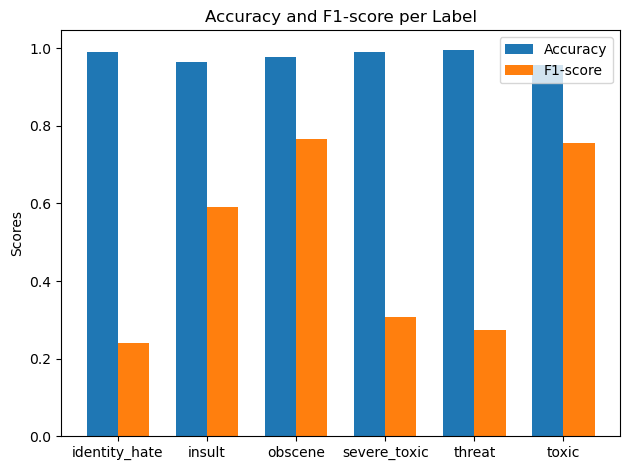

In [16]:
accuracy = accuracy_score(test_df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']], test_pred)
f1 = f1_score(test_df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']], test_pred, average='weighted')
print(f'Accuracy: {accuracy:.3f}, F1-score: {f1:.3f}')

# Calculate accuracy and F1-score for each label
accuracy_per_label = []
f1_per_label = []
for label in label_names:
    accuracy_per_label.append(accuracy_score(test_df[label], test_pred[:, label_names.index(label)]))
    f1_per_label.append(f1_score(test_df[label], test_pred[:, label_names.index(label)]))

# Plot accuracy and F1-score per label
x = np.arange(len(label_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_per_label, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_per_label, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1-score per Label')
ax.set_xticks(x)
ax.set_xticklabels(label_names)
ax.legend()

fig.tight_layout()
plt.show()

## Confusion Matrices
We can create confusion matrices for each of the labels to visualize the performance of the model. The confusion matrix shows the true positives, true negatives, false positives, and false negatives for each label.

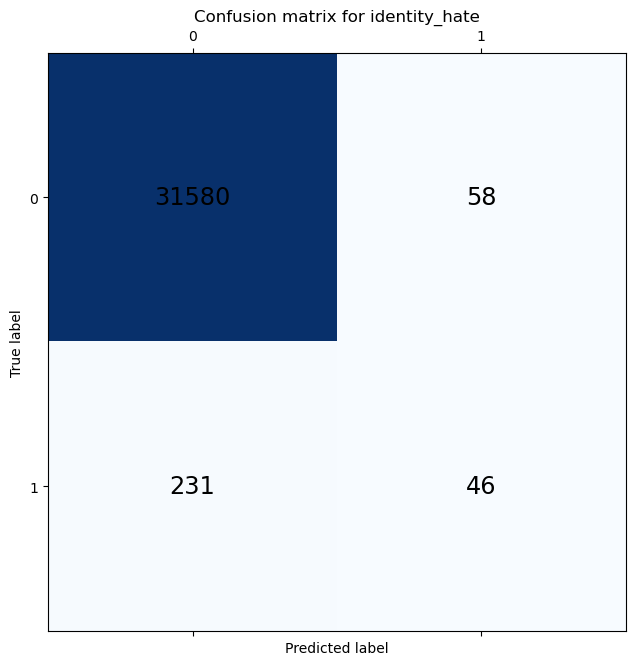

TPR Test :	 0.9927383609443274
TNR Test :	 0.4423076923076923

FPR Test :	 0.5576923076923077
FNR Test :	 0.007261639055672566


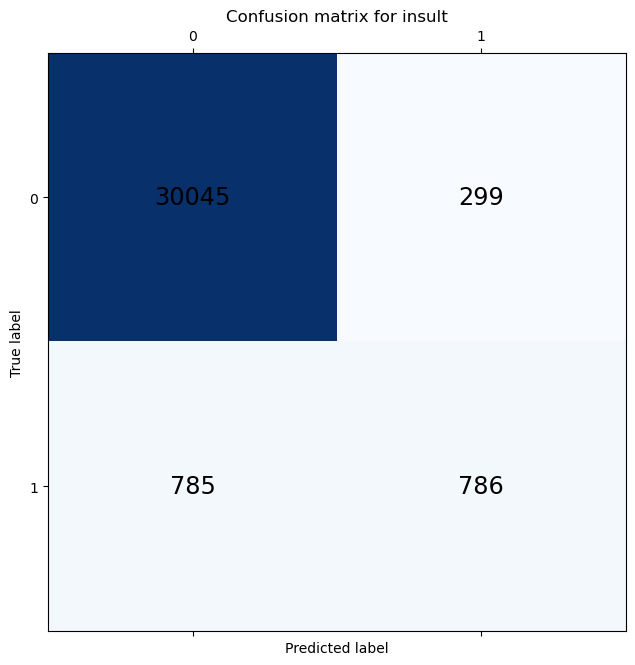

TPR Test :	 0.9745377878689588
TNR Test :	 0.7244239631336405

FPR Test :	 0.27557603686635945
FNR Test :	 0.025462212131041193


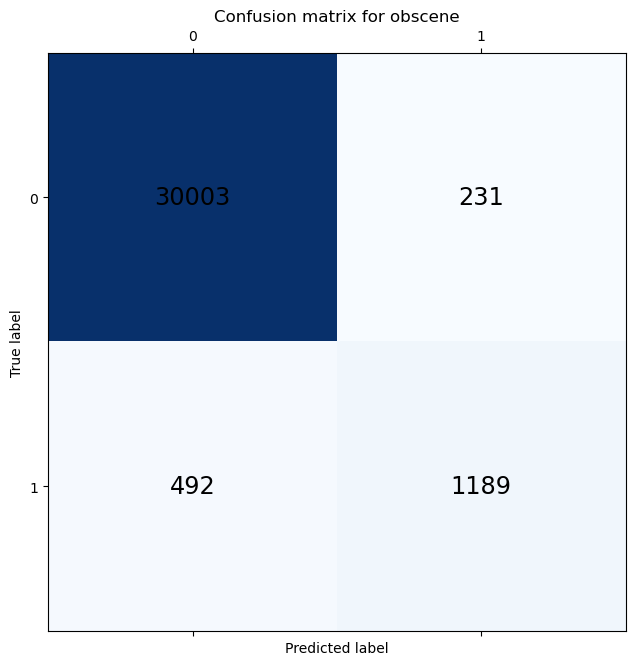

TPR Test :	 0.9838662075750123
TNR Test :	 0.8373239436619718

FPR Test :	 0.16267605633802817
FNR Test :	 0.016133792424987702


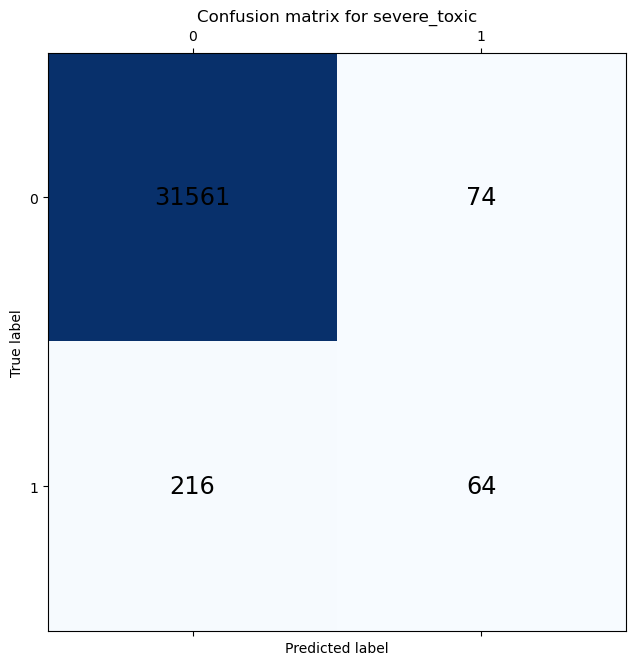

TPR Test :	 0.9932026308336218
TNR Test :	 0.463768115942029

FPR Test :	 0.5362318840579711
FNR Test :	 0.006797369166378198


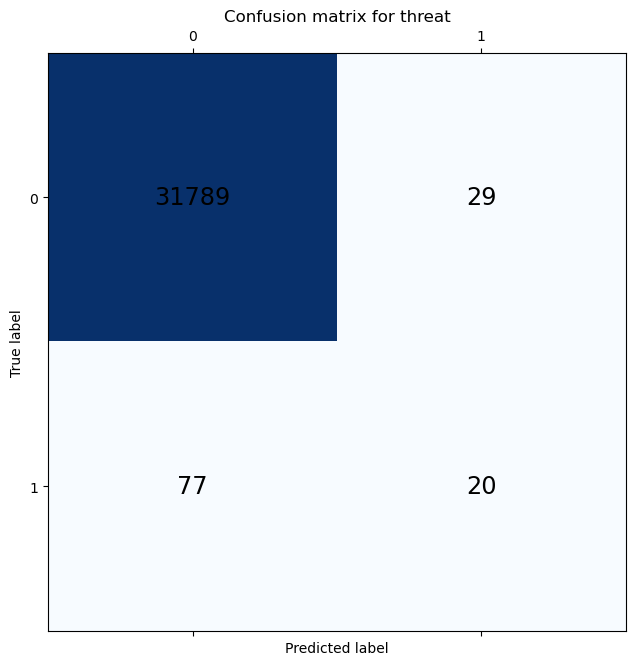

TPR Test :	 0.997583631456725
TNR Test :	 0.40816326530612246

FPR Test :	 0.5918367346938775
FNR Test :	 0.002416368543274964


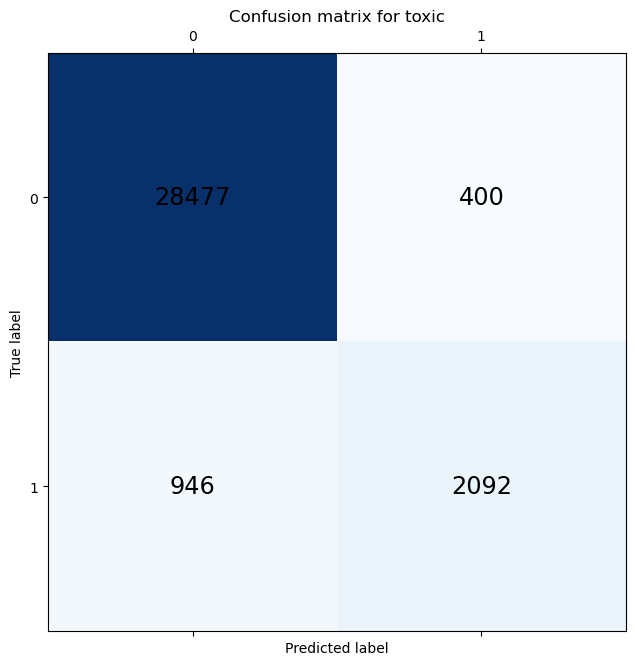

TPR Test :	 0.9678482819562927
TNR Test :	 0.8394863563402889

FPR Test :	 0.16051364365971107
FNR Test :	 0.032151718043707304


In [118]:
 def plot_confusion_matrix(y_true, y_pred, label_name):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion matrix for {label_name}')
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.show()
    tpTest = cm[0][0] # True Positives : Good (1) predicted Good (1)
    fpTest = cm[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cm[1][1] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cm[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
    

for i, label_name in enumerate(label_names):
    plot_confusion_matrix(test_df[label_name], test_pred[:, i], label_name)

## Precision-Recall Curves
Precision-Recall curves show the trade-off between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

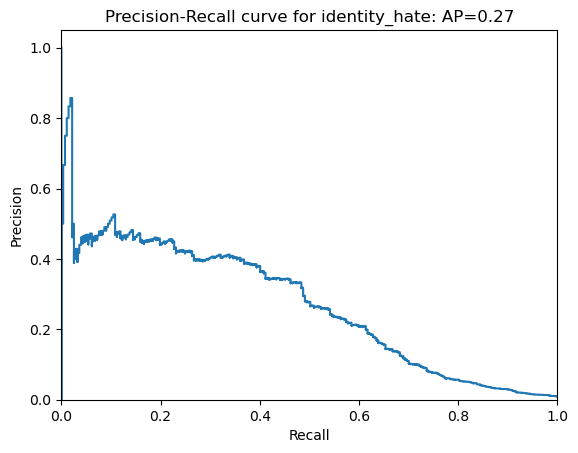

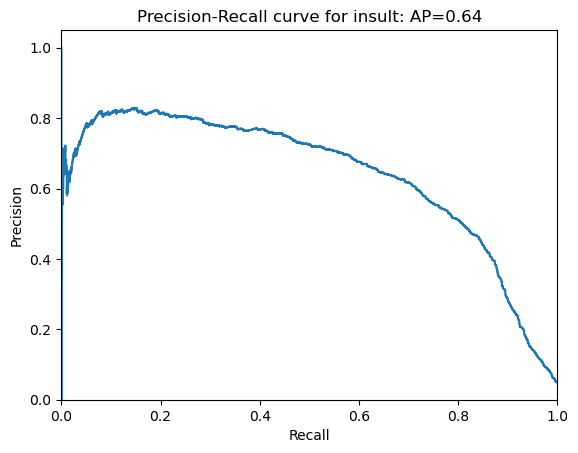

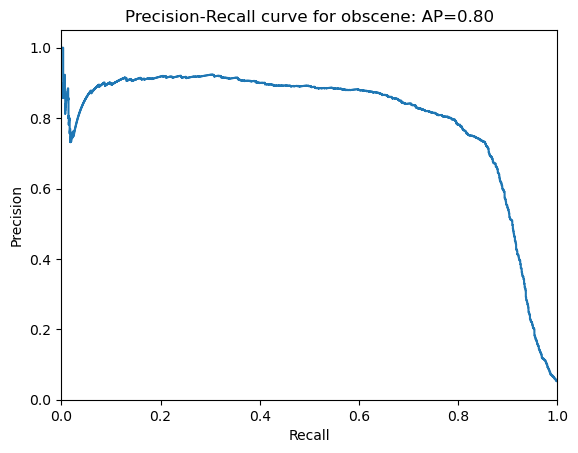

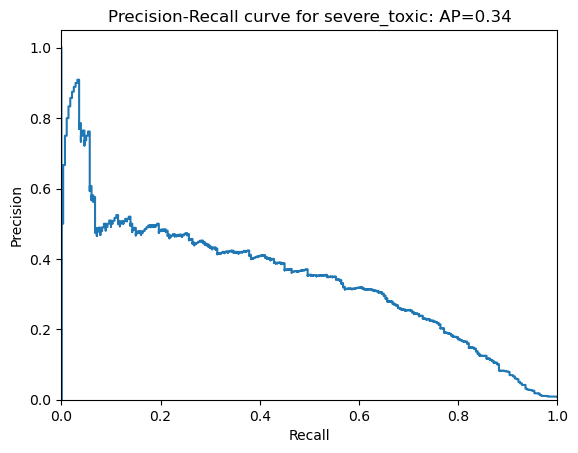

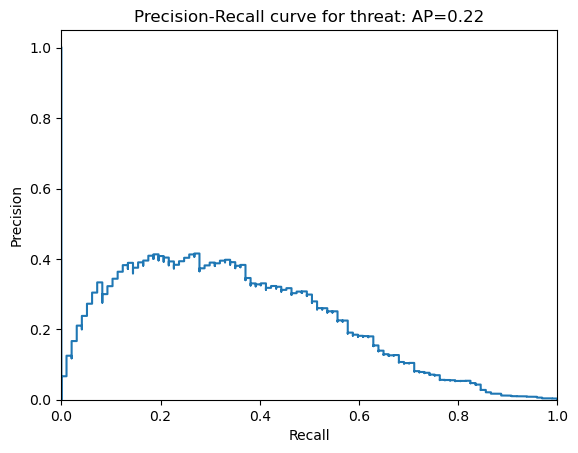

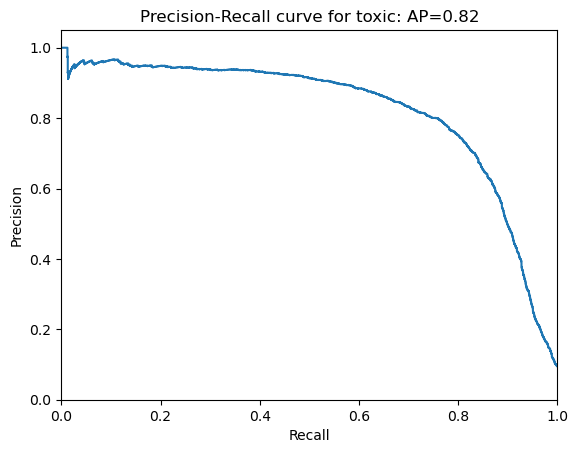

In [18]:
def plot_precision_recall_curve(y_true, y_scores, label_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    average_precision = average_precision_score(y_true, y_scores)
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall curve for {label_name}: AP={average_precision:.2f}')
    plt.show()

y_scores = clf.decision_function(test_features)
for i, label_name in enumerate(label_names):
    plot_precision_recall_curve(test_df[label_name], y_scores[:, i], label_name)

## Perdiction
Warning: Offensive words included

In [19]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def predict_toxicity(comments):
    features = vectorizer.transform(comments)
    predictions = clf.predict(features)
    pred_probabilities = clf.predict_proba(features)

    for i, comment in enumerate(comments):
        print(f"Comment {i + 1}:")
        print(comment)
        print("\nPredictions:")

        for j, label in enumerate(label_names):
            print(f"{label}: {predictions[i][j]}, Probability: {pred_probabilities[i][j]:.2f}")

        print("\n" + "-" * 50 + "\n")

# Usage example:
new_comments = [
    'The effort she had to pour into this must have been monumental. We cant thank Gura enough. Her and everyone involved. What a show',
    'Id nominate Gura for an Oscar, I genuinely could not tell if she passed elementary math or if its all an act.',
    'The showcase was genuinely so funny and entertaining. Thanks to everyone involved!',
    'Gura is a whore, she only deserves to give me a blowjob',
    'No one really likes Gura, I cant wait to see her death',
    'you deserve to starve, the nazis should have killed you inferior peoples',
    'you are a bunch of bitch for American whores',
]

predict_toxicity(new_comments)


Comment 1:
The effort she had to pour into this must have been monumental. We cant thank Gura enough. Her and everyone involved. What a show

Predictions:
identity_hate: 0, Probability: 0.02
insult: 0, Probability: 0.01
obscene: 0, Probability: 0.00
severe_toxic: 0, Probability: 0.01
threat: 0, Probability: 0.00
toxic: 0, Probability: 0.01

--------------------------------------------------

Comment 2:
Id nominate Gura for an Oscar, I genuinely could not tell if she passed elementary math or if its all an act.

Predictions:
identity_hate: 0, Probability: 0.01
insult: 0, Probability: 0.00
obscene: 0, Probability: 0.00
severe_toxic: 0, Probability: 0.01
threat: 0, Probability: 0.00
toxic: 0, Probability: 0.00

--------------------------------------------------

Comment 3:
The showcase was genuinely so funny and entertaining. Thanks to everyone involved!

Predictions:
identity_hate: 0, Probability: 0.01
insult: 0, Probability: 0.05
obscene: 0, Probability: 0.03
severe_toxic: 0, Probabilit

# Deep Learning Model

We will be using tenserflow in order to predict the same dataset in order to see which one is more effective


In [70]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [21]:
import tensorflow as tf

In [72]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

 ## Preprocess

We will be using text_vectorizer here instead in order to preserve the order of the sentences.
Basically each word will be refered to a by a unique number(determined by a generated library) and the sentence will be made into an array of numbers


In [25]:
from tensorflow.keras.layers import TextVectorization

In [89]:
X = df['comment_text']
y = df.drop(columns = ['comment_text', 'id', 'set'])
y = y.iloc[: , :-1]

In [90]:
y

,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
159566,0.0,0.0,0.0,0.0,0.0,0.0
159567,0.0,0.0,0.0,0.0,0.0,0.0
159568,0.0,0.0,0.0,0.0,0.0,0.0
159569,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
MAX_WORDS = 200000 # Number of Unique words in the library

In [92]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1000,
                               output_mode='int') # We set max words here to be 1000

In [93]:
vectorizer.adapt(X.values)

In [94]:
vectorized_text = vectorizer(X.values)

Example of what vecterizer does, notice that 'are' is always represented as 21 and 'you' is always represented as 7 for example

In [95]:
vectorizer('Hello World! How are you? Hope you are having a good day!')[:12]

<tf.Tensor: shape=(12,), dtype=int64, numpy=
array([308, 248,  75,  21,   7, 233,   7,  21, 353,   8, 103, 300],
      dtype=int64)>

### Generated Library

In [96]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'i',
 'of',
 'and',
 'you',
 'a',
 'is',
 'that',
 'it',
 'in',
 'for',
 'this',
 'not',
 'on',
 'be',
 's',
 'as',
 'have',
 'are',
 'your',
 't',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'wikipedia',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'can',
 'talk',
 'me',
 'about',
 'so',
 'what',
 'there',
 'all',
 'has',
 'will',
 'please',
 'no',
 'they',
 'would',
 'he',
 'one',
 'like',
 'just',
 'we',
 'which',
 'any',
 'been',
 'should',
 'don',
 'more',
 'some',
 'other',
 'here',
 'who',
 'see',
 'also',
 'his',
 'm',
 'fuck',
 'think',
 'because',
 'know',
 'how',
 'people',
 'am',
 'edit',
 'why',
 'up',
 'only',
 'out',
 'articles',
 'use',
 'when',
 'then',
 'time',
 'may',
 'were',
 'block',
 'did',
 'them',
 'now',
 'user',
 'being',
 'their',
 're',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'well',
 'very',
 've',
 'information',
 'does',
 'could',
 'want',
 'deletion',
 'its',
 'such',
 'sources',
 '

In [97]:
vectorized_text #fills empty space with '0's

<tf.Tensor: shape=(159571, 1000), dtype=int64, numpy=
array([[  668,    79,     2, ...,     0,     0,     0],
       [  146, 15757,    52, ...,     0,     0,     0],
       [  407,   416,     4, ...,     0,     0,     0],
       ...,
       [28310,  6902,  4876, ...,     0,     0,     0],
       [    6,    11,   566, ...,     0,     0,     0],
       [    6,     4,   139, ...,     0,     0,     0]], dtype=int64)>

Creating a data pipeline to help with memory

In [98]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [99]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.1))
test = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.2))

## Creating model

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [101]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_WORDS+1, 32)) # +1 just in case, there are too many unique words
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [102]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [167]:
history = model.fit(train, epochs=5, validation_data=val) #You can try to change the epoch value for more accurate results but it will take longer


Epoch 1/5
6981/6981 [==============================] - 1802s 258ms/step - loss: 0.0446 - val_loss: 0.0390
Epoch 2/5
6981/6981 [==============================] - 1819s 261ms/step - loss: 0.0403 - val_loss: 0.0362
Epoch 3/5
6981/6981 [==============================] - 1794s 257ms/step - loss: 0.0356 - val_loss: 0.0308
Epoch 4/5
6981/6981 [==============================] - 1756s 252ms/step - loss: 0.0321 - val_loss: 0.0295
Epoch 5/5
6981/6981 [==============================] - 1850s 265ms/step - loss: 0.0293 - val_loss: 0.0259


<Figure size 800x500 with 0 Axes>

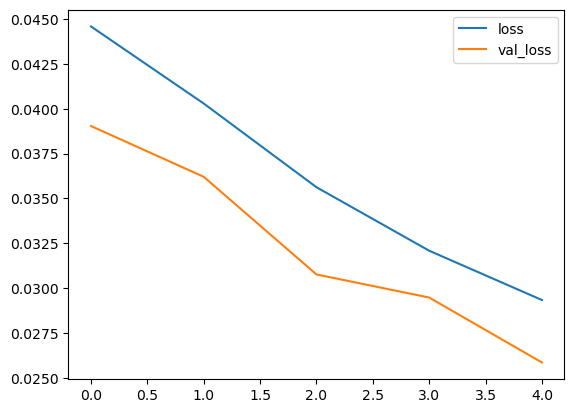

In [177]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## Enter text below to try it out

In [168]:
input_text = vectorizer('You freaking suck! suck my dick.')

In [169]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 46ms/step


(identity_hate, insult, obscene, severe_toxic, threat, toxic)

In [170]:
res

array([[0.02199567, 0.7244123 , 0.98883253, 0.396278  , 0.01155107,
        0.9969557 ]], dtype=float32)

In [171]:
res.shape

(1, 6)

## Evaluation

In [172]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [173]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [174]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_t, y_t = batch
    # Make a prediction 
    yhat = model.predict(X_t)
    
    # Flatten the predictions
    y_t_f = y_t.flatten()
    yhat_f = yhat.flatten()
    yhat_final = yhat.round
    
    pre.update_state(y_t_f, yhat_f)
    re.update_state(y_t_f, yhat_f)
    acc.update_state(y_t_f, yhat_f)

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


In [176]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9082394242286682, Recall:0.7992455959320068, Accuracy:0.1228686049580574
